# K-Means clustering with Mall Customer Segmentation Data

<h1>Introduction</h1>
Machine Learning techniques are broadly divided into two parts :

<li>Supervised Machine Learning
<li>Unsupervised Machine Learning
    
<br>
In <b>Supervised Machine Learning</b>, the data is labelled and the algorithm learns from labelled training data. Examples of this method are Classification and Regression.
    
<br>
In <b>Unsupervised Machine Learning</b>, we do not need to supervise the model. Such a method deals with unlabelled data. Unsupervised machine learning helps us find hidden and unknown patterns in data.
    
<br>
Often it easier to get unlabelled data as compared to labelled data, and in such cases, we can use unsupervised machine learning to work on the data. Data, which needs categorization can be categorized with the help of unsupervised machine learning.

<blockquote>Clustering is a type of unsupervised machine learning in which the algorithm processes our data and divided them into “clusters”.</blockquote>


# The Clustering Explained

Clustering algorithms try to find natural clusters in data, the various aspects of how the algorithms to cluster data can be tuned and modified. Clustering is based on the principle that items within the same cluster must be similar to each other. The data is grouped in such a way that related elements are close to each other.

![Diverse and different types of data are subdivided into smaller groups.](images\clustering.jpg)

## Uses of Clustering

<h2>Marketing:</h2>
    
In the field of marketing, clustering can be used to identify various customer groups with existing customer data. Based on that, customers can be provided with discounts, offers, promo codes etc.

<h2>Real Estate:</h2>

Clustering can be used to understand and divide various property locations based on value and importance. Clustering algorithms can process through the data and identify various groups of property on the basis of probable price.

<h2>BookStore and Library management:</h2>
Libraries and Bookstores can use Clustering to better manage the book database. With proper book ordering, better operations can be implemented.

<h2>Document Analysis:</h2>
Often, we need to group together various research texts and documents according to similarity. And in such cases, we don’t have any labels. Manually labelling large amounts of data is also not possible. Using clustering, the algorithm can process the text and group it into different themes.

These are some of the interesting use cases of clustering.

<h1>K-Means Clustering</h1>

K-Means clustering is an unsupervised machine learning algorithm that divides the given data into the given number of clusters. Here, the “K” is the given number of predefined clusters, that need to be created.

It is a centroid based algorithm in which each cluster is associated with a centroid. The main idea is to reduce the distance between the data points and their respective cluster centroid.

The algorithm takes raw unlabelled data as an input and divides the dataset into clusters and the process is repeated until the best clusters are found.

K-Means is very easy and simple to implement. It is highly scalable, can be applied to both small and large datasets. There is, however, a problem with choosing the number of clusters or K. Also, with the increase in dimensions, stability decreases. But, overall K Means is a simple and robust algorithm that makes clustering very easy.


# Mall Customer Data: Implementation of K-Means in Python

Mall Customer data is an interesting dataset that has hypothetical customer data. It puts you in the shoes of the owner of a supermarket. You have customer data, and on this basis of the data, you have to divide the customers into various groups.

The data includes the following features:

1. Customer ID

2. Customer Gender

3. Customer Age

4. Annual Income of the customer (in Thousand Dollars)

5. Spending score of the customer (based on customer behaviour and spending nature)

Let us proceed with the code.

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

The necessary libraries are imported.

In [7]:
#Reading the excel file
data=pd.read_csv('datasets/Mall_Customers.csv')

The data is read. I will share a link to the entire code and excel data at the end of the article.

The data has 200 entries, that is data from 200 customers

In [9]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


The data seems to be interesting. Let us look at the data distribution.

<h2>Annual Income Distribution:</h2>

Text(0, 0.5, 'Count')

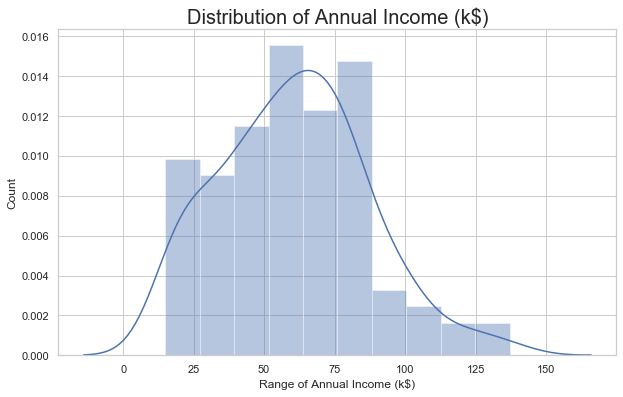

In [12]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Most of the annual income falls between 50K to 85K.

Most of the annual income falls between 50K to 85K.

<h2>Age Distribution:</h2>

Text(0, 0.5, 'Count')

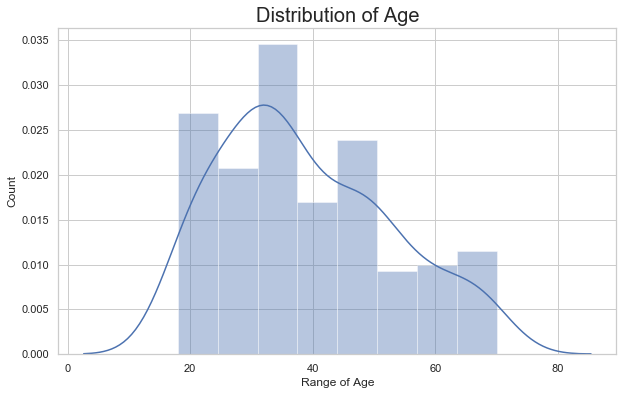

In [13]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

There are customers of a wide variety of ages.

<h2>Spending Score Distribution:</h2>

Text(0, 0.5, 'Count')

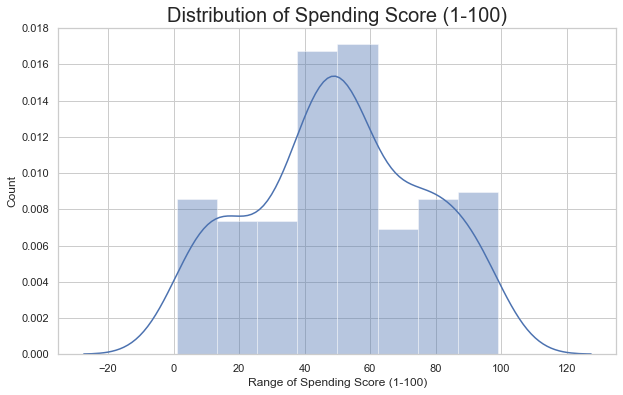

In [15]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')


The maximum spending score is in the range of 40 to 60.

<h2>Gender Analysis:</h2>

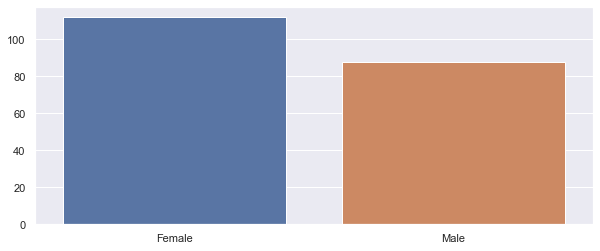

In [16]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

More female customers than male.

I have made more visualizations. Do have a look at the GitHub link at the end to understand the data analysis and overall data exploration.

<h2>Clustering based on 2 features</h2>

First, we work with two features only, annual income and spending score.

In [17]:
#We take just the Annual Income and Spending score
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [18]:
#The input data
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


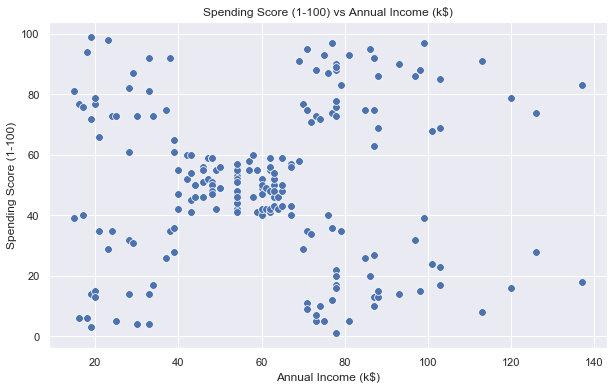

In [19]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [21]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k. Next, we choose the k for which WSS first starts to diminish. This value of K gives us the best number of clusters to make from the raw data.

In [22]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

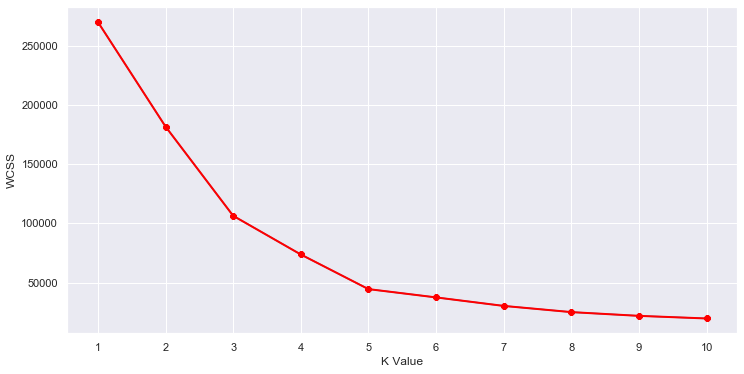

In [24]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

This is known as the elbow graph, the x-axis being the number of clusters, the number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. Here in the graph, after 5 the drop is minimal, so we take 5 to be the number of clusters.

In [26]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


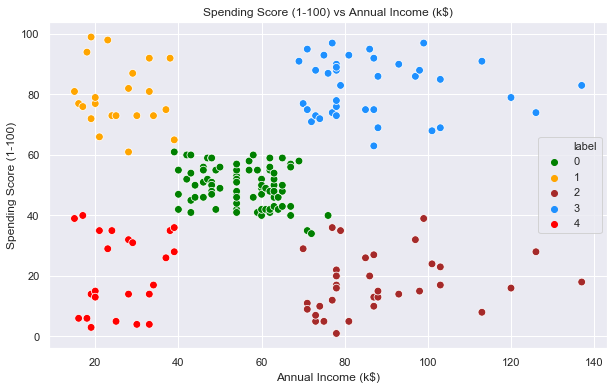

In [27]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

We can clearly see that 5 different clusters have been formed from the data. The red cluster is the customers with the least income and least spending score, similarly, the blue cluster is the customers with the most income and most spending score.

<h2>k-Means Clustering on the basis of 3D data</h2>
Now, we shall be working on 3 types of data. Apart from the spending score and annual income of customers, we shall also take in the age of the customers.

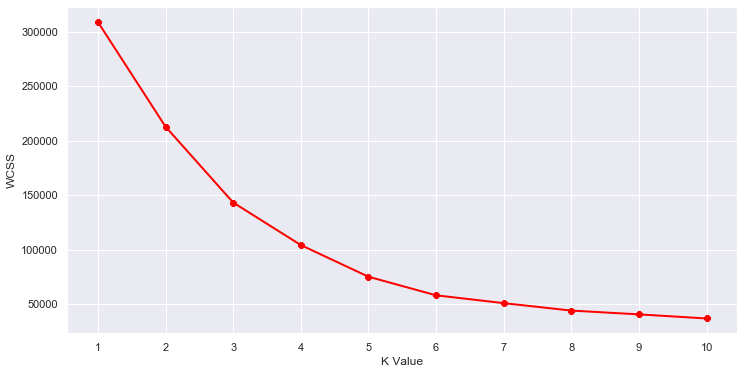

In [30]:
#Taking the features
X2=df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Here can assume that K=5 will be a good value.

In [34]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df1["label"] = y2
#The data with labels
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,5
1,2,Male,21,15,81,7
2,3,Female,20,16,6,0
3,4,Female,23,16,77,7
4,5,Female,31,17,40,0


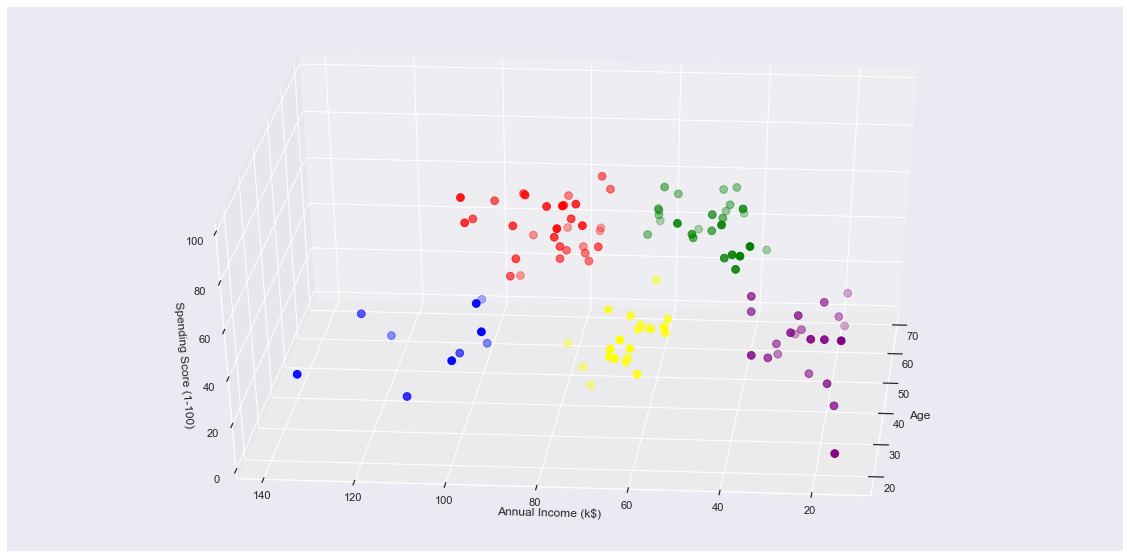

In [39]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='purple', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='green', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [40]:
df2=df1

In [42]:
cust1=df2[df2["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df2[df2["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df2[df2["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df2[df2["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df2[df2["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 32
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186]
--------------------------------------------
Number of customer in 2nd group= 10
They are - [181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 3rd group= 21
They are - [ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 43 45]
--------------------------------------------
Number of customer in 4th group= 27
They are - [ 41  47  51  54  55  57  58  60  61  63  64  65  68  71  73  74  75  81
  83  87  91 103 107 109 110 111 117]
--------------------------------------------
Number of customer in 5th group= 21
They are - [ 76  79  85  88  89  92  95  96  98 100 101 104 106 112 114 115 116 121
 125 133 143]
--------------------------------------------


So, we used K-Means clustering to understand customer data. K-Means is a good clustering algorithm. Almost all the clusters have similar density. It is also fast and efficient in terms of computational cost.

https://github.com/mshahidbhatti